In this notebook we test our data with BERT model without preprocessing.with 1000 observations

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("AMAZON_FASHION.json.gz",sep='\t',header=0)
df1

,"{""overall"": 5.0, ""verified"": true, ""reviewTime"": ""10 20, 2014"", ""reviewerID"": ""A1D4G1SNUZWQOT"", ""asin"": ""7106116521"", ""reviewerName"": ""Tracy"", ""reviewText"": ""Exactly what I needed."", ""summary"": ""perfect replacements!!"", ""unixReviewTime"": 1413763200}"
0,"{""overall"": 2.0, ""vote"": ""3"", ""verified"": true..."
1,"{""overall"": 4.0, ""verified"": false, ""reviewTim..."
2,"{""overall"": 2.0, ""verified"": true, ""reviewTime..."
3,"{""overall"": 3.0, ""verified"": false, ""reviewTim..."
4,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
...,...
883630,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
883631,"{""overall"": 5.0, ""vote"": ""2"", ""verified"": true..."
883632,"{""overall"": 3.0, ""verified"": true, ""reviewTime..."
883633,"{""overall"": 3.0, ""verified"": true, ""reviewTime..."


In [2]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rt', encoding='utf-8')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('AMAZON_FASHION.json.gz')
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
883631,5.0,True,"02 21, 2017",A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200,NaN,NaN,NaN
883632,5.0,True,"11 25, 2016",A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000,2,NaN,NaN
883633,3.0,True,"11 10, 2016",A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,1478736000,NaN,NaN,NaN
883634,3.0,True,"11 10, 2016",A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,1478736000,NaN,NaN,NaN


In [3]:
df.describe()

,overall,unixReviewTime
count,883636.00000,8.836360e+05
mean,3.90694,1.456751e+09
std,1.41828,4.430691e+07
min,1.00000,1.036973e+09
25%,3.00000,1.434240e+09
50%,5.00000,1.462234e+09
75%,5.00000,1.484266e+09
max,5.00000,1.538352e+09


In [4]:
df.isna().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          92
reviewText          1233
summary              533
unixReviewTime         0
vote              803736
style             579067
image             854829
dtype: int64

In [5]:
newdf = df.sample(n=1000, random_state=42) #getting a sample data of 1000 from the existing data set with the random state 42 to unsure the reproducibility
newdf   #new data set with 1000 random rows is called as newdf

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
87569,2.0,False,"08 24, 2014",AWIYG7HFJJEIB,B007XD6K1U,osiris,nut Malo es very cheap,Two Stars,1408838400,NaN,NaN,NaN
691612,1.0,True,"06 14, 2016",A8Q2DT85Q8CAN,B01423Q1E4,Waistin$,It seems the sizing of this is way off. I rea...,Entirely too small!,1465862400,NaN,NaN,NaN
204341,1.0,True,"04 30, 2016",ANAE9TUXKTR6X,B00LWZH8C0,peter politano,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,1461974400,NaN,{'Color:': ' #M01. 2 Pairs: Steel + Gold'},NaN
625152,2.0,True,"03 28, 2016",A2JK19L9NH65JB,B00VPQXYW4,Amazon Customer,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...,1459123200,NaN,NaN,NaN
457145,5.0,True,"10 11, 2016",A29VT82OW77PZ7,B00D7UX1YM,Apostle Arthur Young,I love this wallet,Five Stars,1476144000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
387063,4.0,True,"10 14, 2016",A2Y1HX10GBWEU7,B01FQ9TOUG,jessiebeaudry18,I typically wear a S/M in shirts. I ordered WA...,"The shirt looks good, but it would has been cr...",1476403200,NaN,NaN,NaN
180489,5.0,True,"01 1, 2015",A243PV4BRZZRPL,B00JEL49EY,Daniel E. Parnell,Works well,Five Stars,1420070400,NaN,NaN,NaN
582409,3.0,True,"06 24, 2015",A17X78X4X7MI76,B00Q48Z944,NAYRA VERONICA NAVAS,Extremely Large!,Three Stars,1435104000,NaN,NaN,NaN
264741,4.0,True,"09 9, 2015",A1SFIF384CBRBA,B00W035XJI,Ayrel d.,Very cute very warm and very comfortable I lov...,would recommend,1441756800,NaN,NaN,NaN


In [6]:
newdf.isna().sum() #finding the missing or null values 

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName        0
reviewText          2
summary             0
unixReviewTime      0
vote              907
style             664
image             962
dtype: int64

In [8]:
new_df = newdf.dropna(subset=['reviewText']).reset_index(drop=True) #dropping missing or null values (will be missing 2 rows)

In [9]:
new_df.isna().sum() #finding the missing values again, new_df = without missing values remaining 998 data points

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote              905
style             663
image             960
dtype: int64

we want to find out how many of each sentiment consist of and the two figures show the results

In [10]:
df['overall'].value_counts ()

5.0    465476
4.0    149331
1.0    107080
3.0     97031
2.0     64718
Name: overall, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')

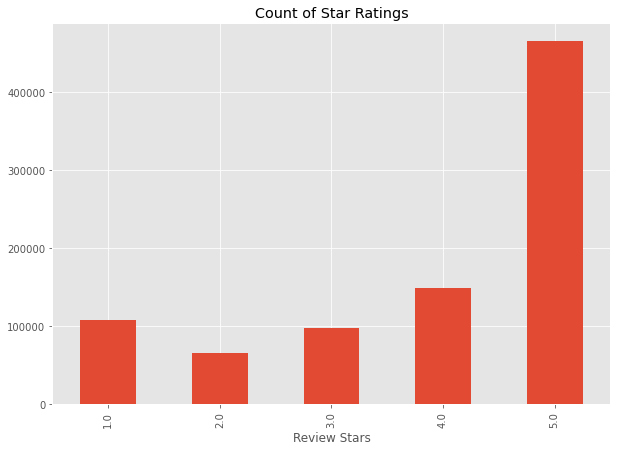

In [12]:
AX = df['overall'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Star Ratings',
          figsize=(10, 7))
AX.set_xlabel('Review Stars')
plt.show()                  #adding graph for entire data

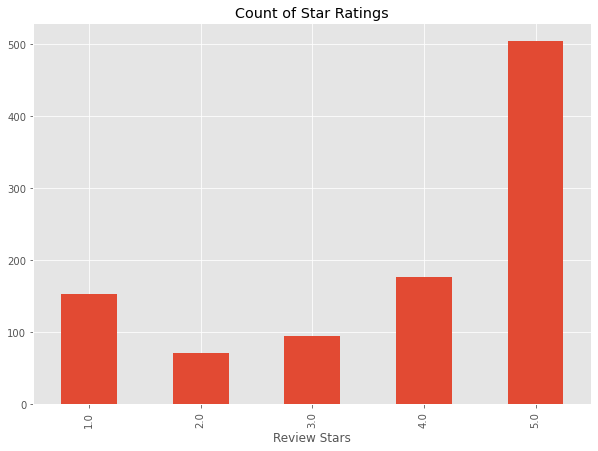

In [13]:
AX = new_df['overall'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Count of Star Ratings',
          figsize=(10, 7))
AX.set_xlabel('Review Stars')
plt.show() 

In [14]:
my_columns = ['overall', 'verified', 'reviewerID', 'reviewText', 'summary']


mydf = new_df.loc[:, my_columns]
mydf    # Create a new DataFrame 'mydf' with only the selected columns

,overall,verified,reviewerID,reviewText,summary
0,2.0,False,AWIYG7HFJJEIB,nut Malo es very cheap,Two Stars
1,1.0,True,A8Q2DT85Q8CAN,It seems the sizing of this is way off. I rea...,Entirely too small!
2,1.0,True,ANAE9TUXKTR6X,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...
3,2.0,True,A2JK19L9NH65JB,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...
4,5.0,True,A29VT82OW77PZ7,I love this wallet,Five Stars
...,...,...,...,...,...
993,4.0,True,A2Y1HX10GBWEU7,I typically wear a S/M in shirts. I ordered WA...,"The shirt looks good, but it would has been cr..."
994,5.0,True,A243PV4BRZZRPL,Works well,Five Stars
995,3.0,True,A17X78X4X7MI76,Extremely Large!,Three Stars
996,4.0,True,A1SFIF384CBRBA,Very cute very warm and very comfortable I lov...,would recommend


In [15]:
def cal_sentiment(overall):                #function to determine the sentiment
    if overall > 3:
        return 'Positive'
    elif overall     == 3:
        return 'Neutral'
    else:
        return 'Negative'

mydf['Sentiment of Star Ratings'] = mydf['overall'].apply(cal_sentiment)        # Apply the function to create the 'Star Ratings' column
mydf

,overall,verified,reviewerID,reviewText,summary,Sentiment of Star Ratings
0,2.0,False,AWIYG7HFJJEIB,nut Malo es very cheap,Two Stars,Negative
1,1.0,True,A8Q2DT85Q8CAN,It seems the sizing of this is way off. I rea...,Entirely too small!,Negative
2,1.0,True,ANAE9TUXKTR6X,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,Negative
3,2.0,True,A2JK19L9NH65JB,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...,Negative
4,5.0,True,A29VT82OW77PZ7,I love this wallet,Five Stars,Positive
...,...,...,...,...,...,...
993,4.0,True,A2Y1HX10GBWEU7,I typically wear a S/M in shirts. I ordered WA...,"The shirt looks good, but it would has been cr...",Positive
994,5.0,True,A243PV4BRZZRPL,Works well,Five Stars,Positive
995,3.0,True,A17X78X4X7MI76,Extremely Large!,Three Stars,Neutral
996,4.0,True,A1SFIF384CBRBA,Very cute very warm and very comfortable I lov...,would recommend,Positive


In [16]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification #we use bert tokenization method to tokenize the input data 
import torch
import requests
import re



train_df, test_df = train_test_split(mydf, test_size=0.2, random_state=42) # Split the data into training and testing sets


tokenizer = AutoTokenizer.from_pretrained('LiYuan/amazon-review-sentiment-analysis') # Load the pretrained BERT model and tokenizer
my_model = AutoModelForSequenceClassification.from_pretrained('LiYuan/amazon-review-sentiment-analysis')


def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt',truncation=True, padding=True) # Function to calculate sentiment score
    result = my_model(tokens)
    return int(torch.argmax(result.logits)) + 1


test_df['Predicted Rating'] = test_df['reviewText'].apply(lambda x: sentiment_score(x[:512])) # Apply the sentiment_score function to the testing set

In [19]:
def cal_sentiment(Overall):                #function to determine the sentiment
    if Overall > 3:
        return 'Positive'
    elif Overall     == 3:
        return 'Neutral'
    else:
        return 'Negative'

test_df['Sentiment of Predicted Ratings'] = test_df['Predicted Rating'].apply(cal_sentiment)        # Apply the function to create the 'Star Ratings' columntest_df

In [20]:
test_df

,overall,verified,reviewerID,reviewText,summary,Sentiment of Star Ratings,Predicted Rating,Sentiment of Predicted Ratings
453,4.0,True,A6JI4C8MHTOOV,A gift for my Grand daughter.,Four Stars,Positive,5,Positive
792,5.0,True,A3237ZA8A3LAE6,I really like is very cute when I used the who...,Five Stars,Positive,5,Positive
209,5.0,True,AAVARJ4GEWTFJ,My mom loves oversized glasses. These are OVE...,Five Stars,Positive,5,Positive
309,5.0,True,A3VIVSN4ZLG063,"Love this. Great fit, looked great and so soph...",Five Stars,Positive,5,Positive
739,5.0,True,A3R3Y43T1ZQ24N,I puchased this item for my SN son and I accid...,which is amazing. I cannot attest to any BM is...,Positive,5,Positive
...,...,...,...,...,...,...,...,...
78,5.0,True,A7O59BIR429NV,I am so pleased with my recent purchase of my ...,I am a happy customer,Positive,5,Positive
29,5.0,True,A371E0L0B0YJGM,Bought for a friends baby shower. She loves t...,Too cute!,Positive,5,Positive
277,5.0,True,A344AA8V3OIG9K,Very very cute on me! If you're upset about sh...,Great suit,Positive,5,Positive
261,5.0,True,A2ECHAF2BX4TPM,Very high quality for the price! Beautiful co...,Great purchase!,Positive,5,Positive


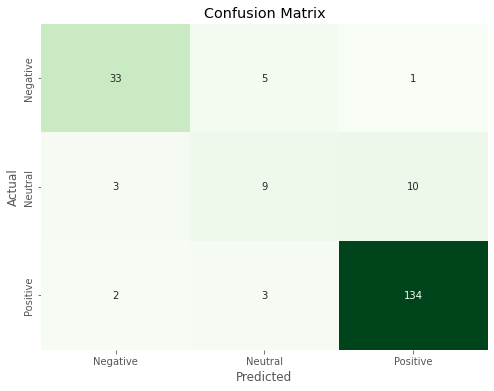

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
from sklearn.metrics import confusion_matrix
import numpy as np


label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2} # Define a mapping from string labels to numerical labels


y_true = np.array([label_mapping[label] for label in test_df['Sentiment of Star Ratings']]) # Convert the actual and predicted labels to numerical values
y_pred = np.array([label_mapping[label] for label in test_df['Sentiment of Predicted Ratings']])


conf_matrix = confusion_matrix(y_true, y_pred) # Calculate the confusion matrix


classes = list(label_mapping.keys()) # Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:

y_true = test_df['Sentiment of Star Ratings'] # Evaluate the model on the test set               # Actual ratings
y_pred = test_df['Sentiment of Predicted Ratings']  # Predicted ratings


conf_matrix = confusion_matrix(y_true, y_pred) # Calculate the confusion matrix


report = classification_report(y_true, y_pred) # Generate a classification report


print("Confusion Matrix:") # Print the confusion matrix and classification report
print(conf_matrix)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[ 33   5   1]
 [  3   9  10]
 [  2   3 134]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86        39
     Neutral       0.53      0.41      0.46        22
    Positive       0.92      0.96      0.94       139

    accuracy                           0.88       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.87      0.88      0.87       200

